In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

### Analyzing all CoT for Bongard-Hoi with high image detail

In [48]:
all_cotN = [
    'chain_of_thought0',
    'chain_of_thought1',
    'chain_of_thought2',
    'chain_of_thought3'
]
data = pd.DataFrame()

for cotN in all_cotN:
    test_conditions = [
        'test_seen_obj_seen_act',
        'test_seen_obj_unseen_act',
        'test_unseen_obj_seen_act',
        'test_unseen_obj_unseen_act'
    ]

    for test_condition in test_conditions:

        gpt4o_path = f'results/{cotN}/{test_condition}_fewshot_results.csv'
        data_test_condition_gpt4o = pd.read_csv(gpt4o_path)
        data_test_condition_gpt4o['cotN'] = cotN
        data_test_condition_gpt4o['source'] = 'gpt-4o'

        gpt4vi_path = f'/bongard_hoi/results/{cotN}/{test_condition}_fewshot_results.csv'
        data_test_condition_gpt4vis = pd.read_csv(gpt4vi_path)
        data_test_condition_gpt4vis['cotN'] = cotN
        data_test_condition_gpt4vis['source'] = 'gpt-4-vision-preview'

        data = pd.concat([data, data_test_condition_gpt4o, data_test_condition_gpt4vis])

In [58]:
hoitrans = {
    # 'test_seen_obj_seen_act': 59.5,
    # 'test_seen_obj_unseen_act': 63.1,
    # 'test_unseen_obj_seen_act': 64.38,
    # 'test_unseen_obj_unseen_act': 62.87,
    'average_accuracy': 62.46
}
hoitrans = pd.DataFrame.from_dict(hoitrans, orient='index')
hoitrans.columns = ['accuracy']
hoitrans = hoitrans.reset_index().rename(columns={'index': 'test_condition'})
hoitrans['source'] = 'HOITrans (oracle)'
hoitrans['cotN'] = 'chain_of_thought0'

human = {
    # 'test_seen_obj_seen_act': 87.21,
    # 'test_seen_obj_unseen_act': 93.61,
    # 'test_unseen_obj_seen_act': 90.01,
    # 'test_unseen_obj_unseen_act': 94.85,
    'average_accuracy': 91.42
}
human = pd.DataFrame.from_dict(human, orient='index')
human.columns = ['accuracy']
human = human.reset_index().rename(columns={'index': 'test_condition'})
human['source'] = 'Humans'
human['cotN'] = 'chain_of_thought0'

In [59]:
# Define all data
all_data = pd.concat([hoitrans, human])
all_data['accuracy'] = all_data['accuracy'] / 100

# Extract important things from data for each chain of thought condition
for model in ['gpt-4o', 'gpt-4-vision-preview']:
    for cotN in all_cotN:
        print()
        model_cot = data[(data.cotN == cotN) & (data.source == model)].dropna()

        # # Save responses
        # if '1' in cotN or '3' in cotN:

        #     def parse(convo):
        #         import re
        #         pattern = re.compile(r'\{[^}]+\}')
        #         json_objects = pattern.findall(convo)
        #         filtered_objects = []
        #         for obj_str in json_objects:
        #             if f"'role': 'assistant'" in obj_str:
        #                 filtered_objects.append(obj_str)
        #         return filtered_objects
        #     data_cotN['descriptions'] = [parse(convo) for convo in data_cotN.convo] 
        #     path = f'/home/andrewlee0/Documents/GPT-4V DALLE-3 NeurIPS 2024/gpt/bongard_hoi_high_detail/fewshot_gpt-4o/results/{cotN}/image_descriptions.csv'
        #     data_cotN.descriptions.to_csv(path)

        def only_ten_per_concept(rows_concept):
            if len(rows_concept) >= 10:
                rows_concept = rows_concept.reset_index(drop=True).loc[:9]
            return rows_concept
        model_cot = model_cot.groupby(['concept']).apply(only_ten_per_concept)
        model_cot = model_cot[['test_condition', 'accuracy','concept','source','cotN']]
        all_data = pd.concat([all_data, model_cot], ignore_index=True)

        print('Model:', model)
        print('Condition:', cotN)
        print('Shape:', model_cot.shape)
        print('Number of Unique Concepts:', len(model_cot.concept.unique()))
        print('Unique counts per concept:', model_cot.concept.value_counts().unique())
        print('Overall Accuracy:', model_cot.accuracy.mean())

# custom_order = [
#     'HOITrans (oracle)',
#     'gpt-4o',
#     'gpt-4-vision-preview',
#     'Humans'
# ]
# all_data['source'] = pd.Categorical(all_data['source'], categories=custom_order, ordered=True)
# display(all_data)


Model: gpt-4o
Condition: chain_of_thought0
Shape: (1156, 5)
Number of Unique Concepts: 160
Unique counts per concept: [10  8  7  6  5  4  3  2  1]
Overall Accuracy: 0.7534602076124568

Model: gpt-4o
Condition: chain_of_thought1
Shape: (1156, 5)
Number of Unique Concepts: 161
Unique counts per concept: [10  8  6  5  4  3  2  1]
Overall Accuracy: 0.7249134948096886

Model: gpt-4o
Condition: chain_of_thought2
Shape: (1158, 5)
Number of Unique Concepts: 162
Unique counts per concept: [10  8  7  6  5  4  3  2  1]
Overall Accuracy: 0.7167530224525043

Model: gpt-4o
Condition: chain_of_thought3
Shape: (1156, 5)
Number of Unique Concepts: 161
Unique counts per concept: [10  8  6  5  4  3  2  1]
Overall Accuracy: 0.6461937716262975

Model: gpt-4-vision-preview
Condition: chain_of_thought0
Shape: (1149, 5)
Number of Unique Concepts: 161
Unique counts per concept: [10  8  7  6  5  4  3  2  1]
Overall Accuracy: 0.7484769364664926

Model: gpt-4-vision-preview
Condition: chain_of_thought1
Shape: (1

In [51]:
# all_data.to_csv('gpt-4o_bongard_hoi.csv')

['gpt-4o' 'gpt-4-vision-preview']


/tmp/ipykernel_375183/3173910757.py:14: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(


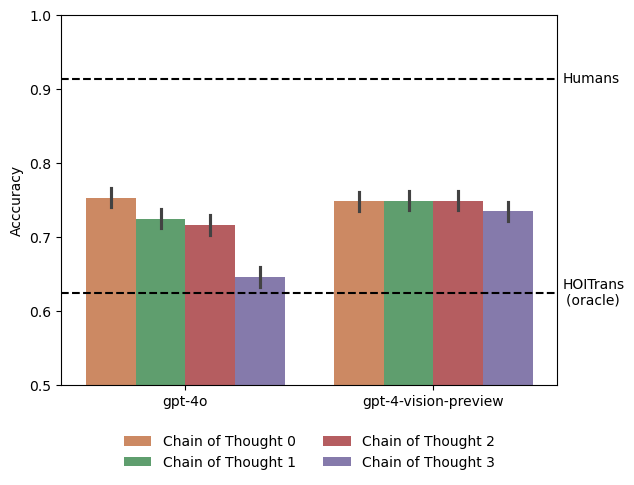

In [123]:
# Remove humans and hoitrans, for plotting
no_human_hoitrans = all_data[(all_data.source != 'Humans') & (all_data.source != 'HOITrans (oracle)')]
print(no_human_hoitrans.source.unique())


def standard_error_proportion(group):
    count = group.sum()
    nobs = len(group)
    p = count / nobs
    sep = np.sqrt(p * (1 - p) / nobs)
    return p - sep, p + sep

fig, ax = plt.subplots(figsize = (6.4, 4.8))
sns.barplot(
    data = no_human_hoitrans,
    x = 'source',
    y = 'accuracy',
    hue = 'cotN',
    errorbar = lambda x: standard_error_proportion(x),
    palette = sns.color_palette('deep')[1:]
).set(
    ylabel = 'Acccuracy',
    xlabel = '',
    ylim = (0.5,1)
)
# sns.despine()

ax.axhline(y = .9142, label = 'Humans', linestyle='--', c='black')
ax.axhline(y = .6246, label = 'HOITrans (oracle)', linestyle='--', c='black')

ax.text(1.75, .9142-0.01, 'Humans',  ha='right', va='bottom')
ax.text(1.77, .6246-0.02, 'HOITrans\n(oracle) ', ha='right', va='bottom')

handles, labels = ax.get_legend_handles_labels()
cotlist = ['Chain of Thought 0', 'Chain of Thought 1', 'Chain of Thought 2', 'Chain of Thought 3']
# plt.legend(labels = cotlist, handles = handles, ncols=2, loc='upper left').get_frame().set_linewidth(0.0)
# legend = plt.legend(labels=cotlist, handles=handles, ncols=2, loc='upper center', bbox_to_anchor=(-0.3, 1), frameon=False)
legend = plt.legend(labels=cotlist, handles=handles, ncols=2, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False)


In [ ]:
fig = plt.figure(figsize = (6.4*1.5, 4.8))
sns.barplot(
    data = all_accuracy_by_test_condition,
    x = 'test_condition',
    y = 'accuracy',
    hue = 'source',  
    errorbar = ('ci', 95)
).set(
    xlabel = '',
    ylabel = 'Accuracy',
    ylim = (0.5,1)
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)).get_frame().set_linewidth(0.0)
sns.despine()

plt.xticks(
    [0,1,2,3],
    [
        'Seen object\nSeen action',
        'Seen object\nUnseen action',
        'Unseen object\nSeen action',
        'Unseen object\nUnseen action'
    ],
)